In [1]:
# import the nessesary libraries required for data analysis and processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import *
from sklearn.metrics import *

In [2]:
# read the data from csv file to pandas dataframe
pd.set_option('display.max_columns', None)
train = pd.read_csv("data.csv")
train.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [3]:
# check if there are any null values in the dataset
train.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [4]:
# check for the data types and identify the categorical variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

#### The Features can be broadly classified into following categories:

1. site - site_id, site_category, site_domain
2. app - app_id, app_domain, app_category
3. device - device_id, device_ip, device_model, device_type, device_conn_type
4. Anonymized categorical features - C1, C14-C21
5. Other features - day, dayofweek, hour, banner_pos
6. Label / Target variable - y or click

In [5]:
# Lets measure the click though rate 
CTR = len(train[train["click"] == 1]) / len(train)
print("Click-Through Rate (CTR): {}%".format(100 * round(CTR,2)))

Click-Through Rate (CTR): 17.0%


We have identified that the Click Through rate is 17% and the rate of Ads NOT clicked is 83%
Hence we know that the lables are imbalanced.

### Part 1 - Missing value and Outlier treatment

In [6]:
# missing value detection
train['C20'].value_counts()

-1         46767
 100084     6071
 100148     4405
 100111     4143
 100077     3915
           ...  
 100108        2
 100109        2
 100010        1
 100137        1
 100175        1
Name: C20, Length: 154, dtype: int64

<b>C20 seems to have some missing values which could be marked as -1. As the missing value count seems to be huge we will drop the column instead of imputing values </b>

In [7]:
# drop C20 as -1 seems to be a missing value 
train.drop(['C20'], axis=1, inplace=True)
print("C20 column is dropped")

C20 column is dropped


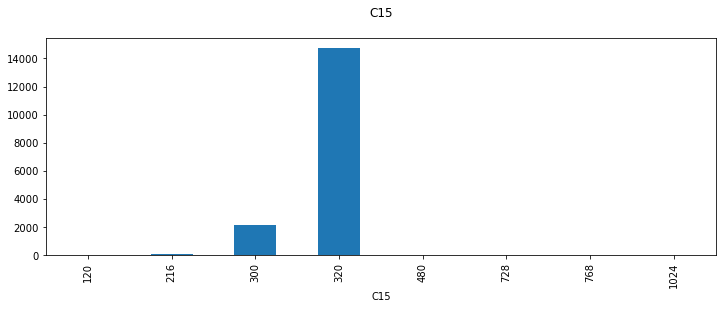

In [8]:
# explore C15 variable
C15 = train.groupby('C15')['y'].sum()
C15.plot.bar(figsize=[12,4])
plt.title("C15\n")
plt.show()

we can observe that 120, 480, 1024 and 768, 728 are outliers. we will impute with 216 to fix the outliers

In [9]:
# Outlier treatment
train['C15'] = train['C15'].apply(lambda x: 216 if x != 320 and x !=300 else x)
train['C15'].value_counts()

320    93136
300     5872
216      991
Name: C15, dtype: int64

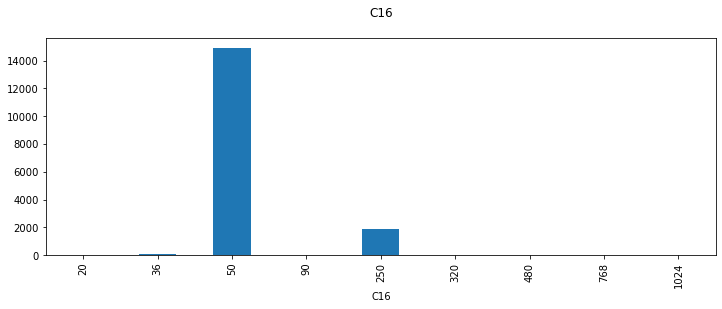

In [10]:
# explore C16 variable
C16 = train.groupby('C16')['y'].sum()
C16.plot.bar(figsize=[12,4])
plt.title("C16\n")
plt.show()

we can observe that 1024, 768, 320, 20, 90, 480 are outliers. we will impute with 36 to fix the outliers

In [11]:
# C16 - outlier treatment
train['C16'] = train['C16'].apply(lambda x: 36 if x != 50 and x !=250 else x)
train['C16'].value_counts()

50     94209
250     4532
36      1258
Name: C16, dtype: int64

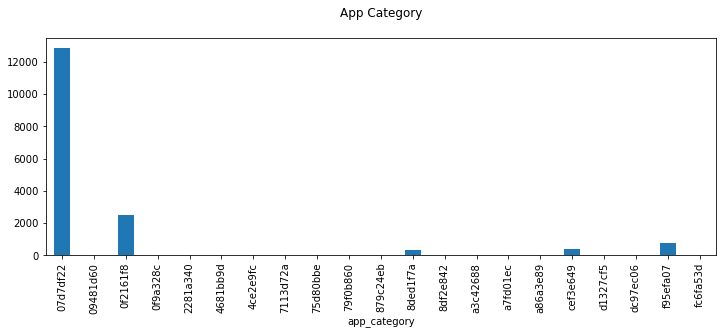

In [12]:
# explore app_category variable
app_category = train.groupby('app_category')['y'].sum()
app_category.plot.bar(figsize=[12,4])
plt.title("App Category\n")
plt.show()

In [13]:
# app_category - outlier treatment
train['app_category'] = train['app_category'].apply(lambda x: 'cef3e649' if x != '07d7df22' and x != '0f2161f8' else x)
train['app_category'].value_counts()

07d7df22    64769
0f2161f8    23644
cef3e649    11586
Name: app_category, dtype: int64

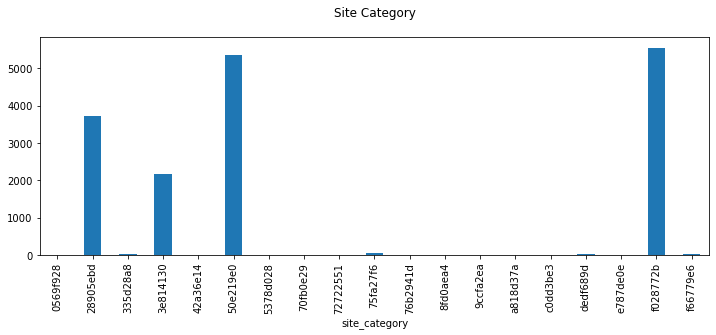

In [14]:
# explore site_category variable
site_category = train.groupby('site_category')['y'].sum()
site_category.plot.bar(figsize=[12,4])
plt.title("Site Category\n")
plt.show()

In [15]:
# site_category - outlier treatment
train['site_category'] = train['site_category'].apply(lambda x: '3e814130' if x != '50e219e0' and x != 'f028772b' and x != '28905ebd' else x)
train['site_category'].value_counts()

50e219e0    40839
f028772b    31408
28905ebd    18107
3e814130     9645
Name: site_category, dtype: int64

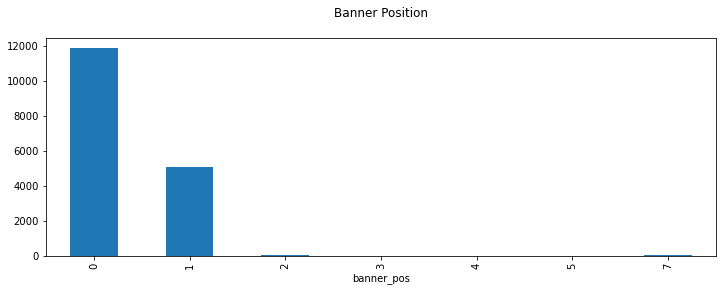

In [16]:
# exolore banner_pos category
banner = train.groupby('banner_pos')['y'].sum()
banner.plot.bar(figsize=[12,4])
plt.title("Banner Position\n")
plt.show()

In [17]:
# banner_pos - outlier treatment
train['banner_pos'] = train['banner_pos'].apply(lambda x: 7 if x != 0 and x != 1 else x)
train['banner_pos'].value_counts()

0    71778
1    28052
7      169
Name: banner_pos, dtype: int64

### Part 2 - Feature Selection and Feature Engineering

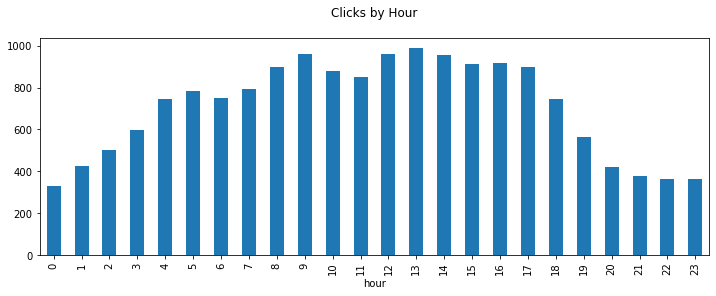

In [18]:
# explore the hour column
hour = train.groupby('hour')['y'].sum()
hour.plot.bar(figsize=[12,4])
plt.title("Clicks by Hour\n")
plt.show()

In [19]:
# define a function to determine if morning / evening based on hour
def fun(x):
    if x >= 0 and x <= 3:
        return "early_morning" 
    elif x >= 6 and x <= 9:
        return "morning"
    elif x >= 10 and x <= 15:
        return "noon"
    elif x >= 16 and x <= 19:
        return "evening"
    else:
        return "late_evening"

# bucket the hour into early_morning / morning / evening / late_evening / noon
train['hour'] = train['hour'].apply(lambda x: fun(x))
print("Hours bucketed into 5 categories - \n")
train['hour'].value_counts()

Hours bucketed into 5 categories - 



noon             32436
morning          19763
late_evening     19071
evening          17868
early_morning    10861
Name: hour, dtype: int64

<AxesSubplot:>

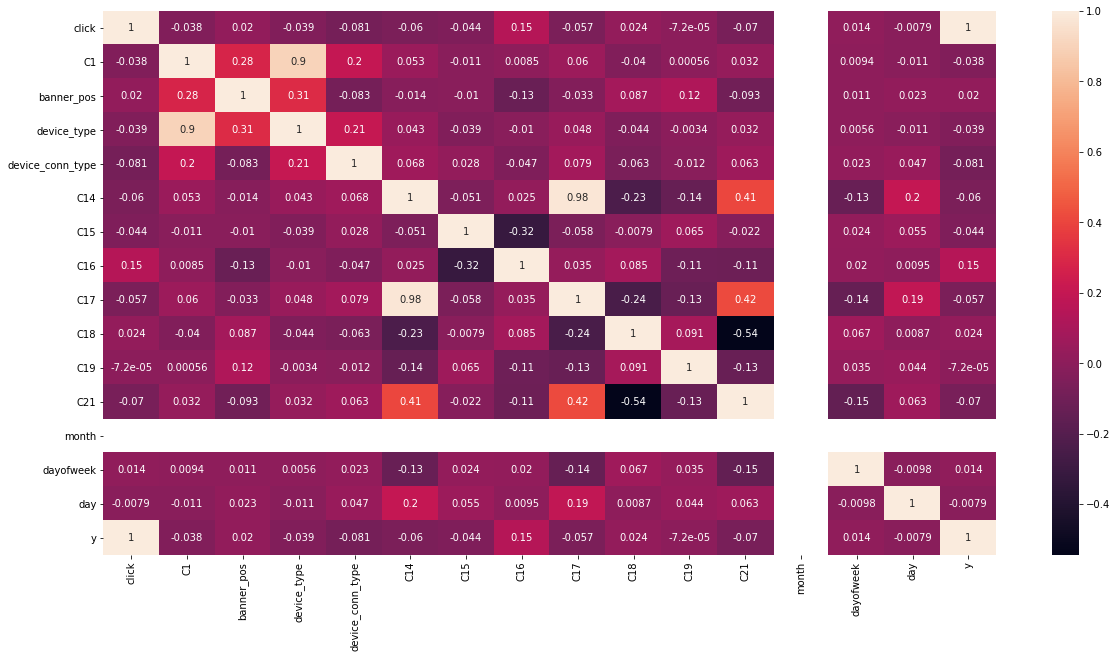

In [20]:
# Print the correlation matrix to find the highly correlated variables/features
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot=True)

1. We find that C14 and C17 have high correlation (0.98) 
2. C21 has high correlation with C18, C17 and C14. 
3. C1 and device_type are highly correlated - we will look at this one later
4. Hence we can drop the columns C17 and C21.

In [21]:
train.drop(['C17', 'C21'], axis=1, inplace=True)

In [22]:
# find the unique values in each column to analyze further
cols = list(train.columns)
print("No of Unique values in each column - \n")
for col in cols:
        print("{} = {}".format(col, str(len(train[col].unique()))))

No of Unique values in each column - 

click = 2
C1 = 7
banner_pos = 3
site_id = 1485
site_domain = 1331
site_category = 4
app_id = 1354
app_domain = 96
app_category = 3
device_id = 16801
device_ip = 78013
device_model = 3145
device_type = 4
device_conn_type = 4
C14 = 1722
C15 = 3
C16 = 3
C18 = 4
C19 = 64
month = 1
dayofweek = 7
day = 10
hour = 5
y = 2


In [23]:
# drop the month column as it has only one month
print(train.month.value_counts())
train.drop(['month'], axis=1, inplace=True)
print("\month column is dropped")

10    99999
Name: month, dtype: int64
\month column is dropped


In [24]:
# drop the click column as its the same a y
print(train.click.value_counts())
print(train.y.value_counts())

train.drop(['click'], axis=1, inplace=True)
print("\nclick column is dropped")

False    83019
True     16980
Name: click, dtype: int64
0    83019
1    16980
Name: y, dtype: int64

click column is dropped


#### Based on the unique values of the columns

#### One Hot Encoding
##### 1. banner_pos, site_category, app_category, device_type, device_conn_type, C15, C16, C18, dayofweek, hour - 
We can use One Hot Encoding on these columns as the categories are lesser in count and will not make the number of columns larger. 

#### Label Encoding
##### 2. site_id, app_id, app_domain, site_domain, device_id, device_ip, device_model, C14, C19, C21 - 
The number of categories are very high in thousands and it will not be feasible to use One hot enconding. So we will use label encoding instead

#### Label Encoding

In [25]:
# Lets encode the categorical variables / features identified earlier for label encoding 
# site_id, site_domain, app_id, app_domain, device_id, device_ip, device_model
labelEncoder = preprocessing.LabelEncoder()

for col in ['site_id', 'app_id','app_domain', 'device_ip', 'device_model', 'site_domain', 'device_id', 'C14', 'C19', 'C1']:
    train[col] = labelEncoder.fit_transform(train[col])

<AxesSubplot:>

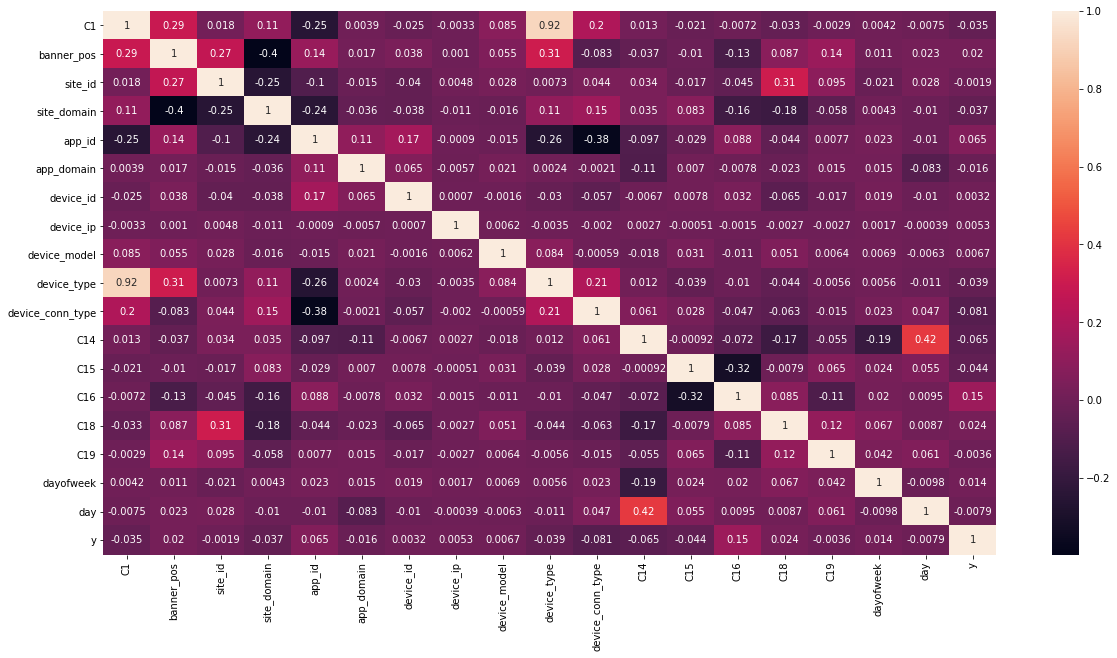

In [26]:
#plot the correlation matrix again
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot=True)

day, device_type and C16 have high correlation with other variables. 
1. We find that C1 and device_type has high correlation (0.92). device_type also has high correlation with 2 other variables.
2. day has high correlation with C14. 
3. C16 has high correlation with C15.
4. Hence we can drop the columns - day, device_type and C16.

In [27]:
train.drop(['day', 'device_type', 'C16'], axis=1, inplace=True)

#### One Hot Encoding

In [28]:
#One Hot Encoding for the identified categorical variables
train = pd.get_dummies(train, columns=['banner_pos','device_conn_type', 'site_category', 'app_category'])
train = pd.get_dummies(train, columns=['C18', 'C15', 'dayofweek', 'hour'])

In [29]:
#checking if all the encoding is done and the data type is int
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   C1                      99999 non-null  int64
 1   site_id                 99999 non-null  int32
 2   site_domain             99999 non-null  int32
 3   app_id                  99999 non-null  int32
 4   app_domain              99999 non-null  int32
 5   device_id               99999 non-null  int32
 6   device_ip               99999 non-null  int32
 7   device_model            99999 non-null  int32
 8   C14                     99999 non-null  int64
 9   C19                     99999 non-null  int64
 10  y                       99999 non-null  int64
 11  banner_pos_0            99999 non-null  uint8
 12  banner_pos_1            99999 non-null  uint8
 13  banner_pos_7            99999 non-null  uint8
 14  device_conn_type_0      99999 non-null  uint8
 15  device_conn_type_2 

In [30]:
#list of final colulmns used for building the model
print("Final columns to be used for training the Model: \n\n", train.columns)

Final columns to be used for training the Model: 

 Index(['C1', 'site_id', 'site_domain', 'app_id', 'app_domain', 'device_id',
       'device_ip', 'device_model', 'C14', 'C19', 'y', 'banner_pos_0',
       'banner_pos_1', 'banner_pos_7', 'device_conn_type_0',
       'device_conn_type_2', 'device_conn_type_3', 'device_conn_type_5',
       'site_category_28905ebd', 'site_category_3e814130',
       'site_category_50e219e0', 'site_category_f028772b',
       'app_category_07d7df22', 'app_category_0f2161f8',
       'app_category_cef3e649', 'C18_0', 'C18_1', 'C18_2', 'C18_3', 'C15_216',
       'C15_300', 'C15_320', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2',
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6',
       'hour_early_morning', 'hour_evening', 'hour_late_evening',
       'hour_morning', 'hour_noon'],
      dtype='object')


### Part 3 - Train Test Split

<b>Create the label(y) and features(X) variables, so that we can create the training and test data</b>

In [31]:
y = train['y']
X = train.drop(['y'], axis=1)

<b>Create the train test split with 80-20 ratio using train_test_split library</b>

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

<b>Verify the train test split</b>

In [33]:
print("y - ", y.shape)
print("y_train - ", y_train.shape)
print("y_test - ", y_test.shape)
print("\nX - ", X.shape)
print("X_train - ", X_train.shape)
print("X_test - ", X_test.shape)

y -  (99999,)
y_train -  (79999,)
y_test -  (20000,)

X -  (99999, 43)
X_train -  (79999, 43)
X_test -  (20000, 43)


As we found earlier that the labels are not balanced we will scale the data using StandardScaler. we will use this only in Logisitic Regression and not in Trees, as Trees does not require scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Part 4 - Model Selection

Following are the models that we will be building as part of this Assignment.

<b>1. Logistic Regression - </b><br>
    <p>We will start with this classic algorithm as we have binary classification in the CTR prediction problem.</p>

<b>2. Decision Tree - </b><br>
    <p>Decision tree is the simple and efficient, can make better predictions, and are interpretable.</p>

<b>3. XGBoost - </b><br>
    <p>Next we will do an advanced classification algorithm, using the boosting technique and the weak learners to build a strong learner. XGBoost will also help us improve with a better model as Decision Tree has the tendency of overfit.</p>
<br>
Next we will improve all the 3 models using the following methods respectively and compare the improvements.
<br>

<b>Model Improvement methods:</b><br>

1. Principal Componet Analysis(PCA) and GridSearchCV  for Logistic Regression

2. Tune Hyperparameters using GridSearchCV cross validation for Decision Tree

3. Tune Hyperparameters using GridSearchCV cross validation for XGBoost 

### Part 5 - Model Building

### 5.0 Dummy Classifier Model

Lets create a Dummy classifier Model and find the predictions. We will use this as a base model to compare other models that we are building

In [35]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

Predict using Dummy classifier model and the test data, and compare the predicted vs actual test labels.
Find the metrics - <i>Accuracy score, Confusion Matrix, Precesion, Recall, F1-score, Log Loss and ROC AUC</i>

*** Dummy Classifier model - Metrics ***

Accuracy score =  0.8312

Confusion Matrix -
 [[16624     0]
 [ 3376     0]]

Classification report - 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     16624
           1       0.00      0.00      0.00      3376

    accuracy                           0.83     20000
   macro avg       0.42      0.50      0.45     20000
weighted avg       0.69      0.83      0.75     20000


Log Loss =  5.830145455460923


C:\Users\knqr526\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


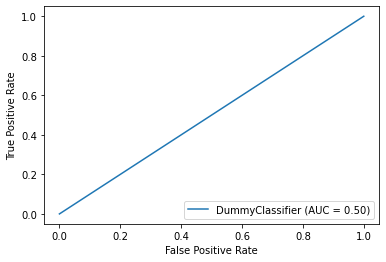

In [36]:
# predict the labels for the test data and print the accuracy and confusion matrix
y_pred = dummy_clf.predict(X_test)

print("*** Dummy Classifier model - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred))

predictions = dummy_clf.predict_proba(X_test)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(dummy_clf, X_test, y_test) 
plt.show()

### 5.1 Logistic Regression Model

<b>Lets create a Logistic Regression Model and train the model using train data</b> 

In [37]:
# Build the model using Logistic Regression
logModel = LogisticRegression(max_iter=300)
logModel.fit(X_train, y_train)

LogisticRegression(max_iter=300)

<b>Predict the test data, and compare the predicted vs actual test labels.<br></b>

Find the metrics - <br>

   <i>Accuracy score, Confusion Matrix, Precesion, Recall, F1-score, Log Loss and ROC AUC</i>

*** Logistic Regression model - Metrics ***

Accuracy score =  0.832

Confusion Matrix -
 [[16608    16]
 [ 3344    32]]

Classification report - 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     16624
           1       0.67      0.01      0.02      3376

    accuracy                           0.83     20000
   macro avg       0.75      0.50      0.46     20000
weighted avg       0.80      0.83      0.76     20000


Log Loss =  0.4313688804517777


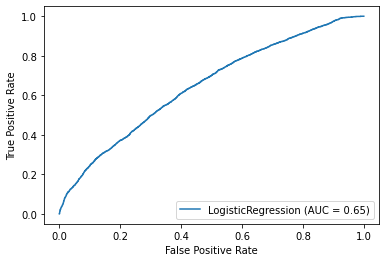

In [38]:
# predict the labels for the test data and print the accuracy and confusion matrix
y_pred = logModel.predict(X_test)

print("*** Logistic Regression model - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred))

predictions = logModel.predict_proba(X_test)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(logModel, X_test, y_test) 
plt.show()

### 7.1 Logistic Regression Model Improvement using PCA and GridSearchCV

In [39]:
## Improving Logisting Regression using PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[ 6.55440583e-02, -1.00161336e-02,  2.28230403e-01, ...,
         2.73221271e-02, -1.63208712e-02,  7.17079159e-03],
       [ 1.30119364e-01,  3.86849319e-01, -2.66755697e-01, ...,
         3.57761763e-02, -1.43224238e-02,  7.88544025e-05],
       [-1.01802902e-01,  8.07753067e-02, -1.26233643e-01, ...,
         3.12785963e-02, -2.98870110e-02, -1.94169954e-02],
       ...,
       [ 0.00000000e+00, -4.07474623e-17,  7.07665754e-17, ...,
         1.25732232e-01,  1.26941375e-01,  1.49487248e-01],
       [ 0.00000000e+00,  6.06090668e-16,  2.94949332e-16, ...,
         1.57889539e-01,  1.59407933e-01,  1.87720144e-01],
       [-0.00000000e+00, -3.25089043e-16, -7.54928419e-17, ...,
         3.77122926e-01,  3.80749645e-01,  4.48374037e-01]])

<b>Calculate the explained variance</b>

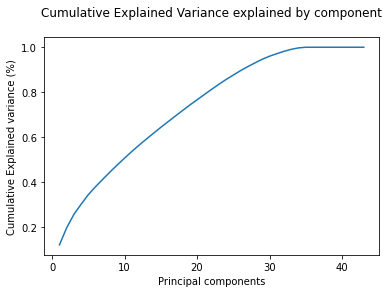

In [40]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.title('Cumulative Explained Variance explained by component\n')
plt.xlabel('Principal components')
plt.ylabel('Cumulative Explained variance (%)')

plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA can explain only 1% variance and would not help with improving the Logisctic Regression. 
The curve also flattens at about 35, so we dont need all 43 components. We will reduce to 35 components for building the model

<b>Reducing Dimentionality with PCA</b>

In [41]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)
df_train_pca = pca_final.fit_transform(X_train)

In [42]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(35, 35)

<AxesSubplot:>

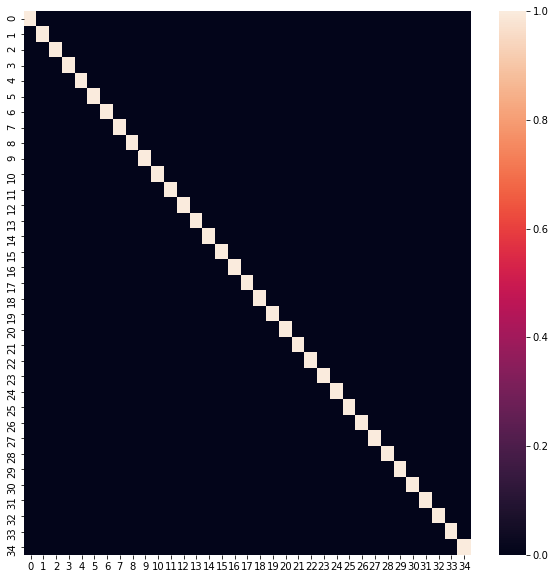

In [43]:
# correlation between the PCA components
plt.figure(figsize=[10, 10])
sns.heatmap(corrmat)

In [44]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(20000, 35)

<b>Train the PCA model with the training data</b>

In [45]:
learner_pca = LogisticRegression(max_iter=300)
model_pca = learner_pca.fit(df_train_pca, y_train)

<b>Predict the test data, and compare the predicted vs actual test labels.<br></b>

Find the metrics - <br>

   <i>Accuracy score, Confusion Matrix, Precesion, Recall, F1-score, Log Loss and ROC AUC</i>

*** Logistic Regression using PCA - Metrics ***

Accuracy score =  0.832

Confusion Matrix -
 [[16608    16]
 [ 3344    32]]

Classification report - 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     16624
           1       0.67      0.01      0.02      3376

    accuracy                           0.83     20000
   macro avg       0.75      0.50      0.46     20000
weighted avg       0.80      0.83      0.76     20000


Log Loss =  0.4313688804517777


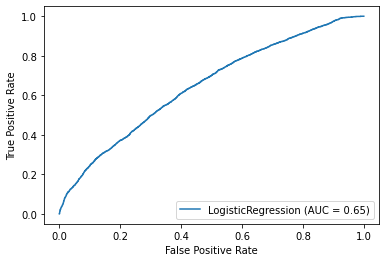

In [46]:
# predict the labels for the test data and print the accuracy and confusion matrix
y_pred1_1 = model_pca.predict(df_test_pca)

print("*** Logistic Regression using PCA - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred1_1))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1_1)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred1_1))

predictions = model_pca.predict_proba(df_test_pca)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(model_pca, df_test_pca, y_test) 
plt.show()

##### Improving Logistic Regression using GridseachCV

In [47]:
#import GridseachCV
from sklearn.model_selection import GridSearchCV

#Instantiate
clf = LogisticRegression(max_iter=300)

#Grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l2']}

#Gridsearch
gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(df_train_pca, y_train)

#Get best hyperparameters
gridsearch.best_params_

{'C': 0.1, 'penalty': 'l2'}

*** Logistic Regression using GridSearchCV - Metrics ***

Accuracy score =  0.832

Confusion Matrix -
 [[16608    16]
 [ 3344    32]]

Classification report - 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     16624
           1       0.67      0.01      0.02      3376

    accuracy                           0.83     20000
   macro avg       0.75      0.50      0.46     20000
weighted avg       0.80      0.83      0.76     20000


Log Loss =  0.4313697595345978


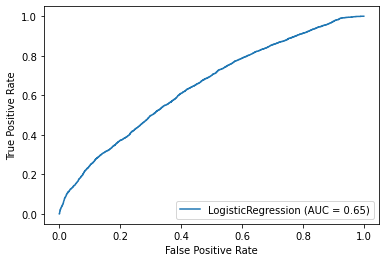

In [48]:
lrgrid = gridsearch.best_estimator_.fit(df_train_pca, y_train)

# predict the labels for the test data and print the accuracy and confusion matrix
y_pred1_2 = lrgrid.predict(df_test_pca)

print("*** Logistic Regression using GridSearchCV - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred1_2))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1_2)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred1_2))

predictions = lrgrid.predict_proba(df_test_pca)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(lrgrid, df_test_pca, y_test) 
plt.show()

### 5.2 Decision Tree Model

In [49]:
#### 2nd Model using Decision Tree ###

In [50]:
# load sklearn libraries required to construct a Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

We will do a train test split again as we dont need the training data that was scaled for Logistic Regression

In [51]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

<b>Create a Decision Tree Classifier and train the model using the training data. </b>

In [52]:
# Create a Decision Tree model
dt_basic = DecisionTreeClassifier()

In [53]:
# Train the model using the training data
dt_basic.fit(X_train, y_train)

DecisionTreeClassifier()

<b>Predict the test data, and compare the predicted vs actual test labels.<br></b>

Find the metrics - <br>

   <i>Accuracy score, Confusion Matrix, Precesion, Recall, F1-score, Log Loss and ROC AUC</i>

*** Decision Tree model - Metrics ***

Accuracy score =  0.74195

Confusion Matrix -
 [[13905  2719]
 [ 2442   934]]

Classification report - 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     16624
           1       0.26      0.28      0.27      3376

    accuracy                           0.74     20000
   macro avg       0.55      0.56      0.55     20000
weighted avg       0.75      0.74      0.75     20000


Log Loss =  8.903795327259497


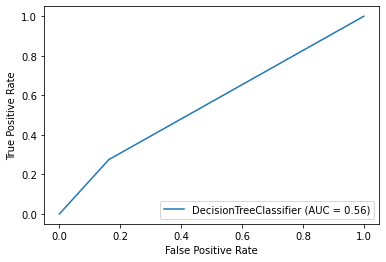

In [54]:
# predict the labels for the test data and print the accuracy and confusion matrix
y_pred2 = dt_basic.predict(X_test)

print("*** Decision Tree model - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred2))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred2))

predictions = dt_basic.predict_proba(X_test)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(dt_basic, X_test, y_test) 
plt.show()

### 7.2 Improving the Decision Tree Model

In [55]:
## Improving the decision tree

<b>Tune the Hyperparameters using GridSearchCV cross validation</b>

In [56]:
# Import the required libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(2, 8, 1),
    'min_samples_leaf' : range(10, 100, 20)
}

n_folds = 5

dtree = DecisionTreeClassifier()

#Use GridSearchCV to buid a tree
grid = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs=-1)

<b>Find the best parameters</b>

In [57]:
# Train the Decision Tree
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 8),
                         'min_samples_leaf': range(10, 100, 20)})

In [58]:
print("Best parameters identified using GridSearchCV - ", grid.best_params_)
print("Best score achieved using GridSearchCV - ", grid.best_score_)

Best parameters identified using GridSearchCV -  {'max_depth': 7, 'min_samples_leaf': 30}
Best score achieved using GridSearchCV -  0.8317604100256266


<b> Train the model using the best estimator</b>

In [59]:
# Train the model identified with best estimator
grid.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=30)

<b>Predict the test data, and compare the predicted vs actual test labels.<br></b>

Find the metrics - <br>

   <i>Accuracy score, Confusion Matrix, Precesion, Recall, F1-score, Log Loss and ROC AUC</i>

*** Decision Tree model - Metrics ***

Accuracy score =  0.83195

Confusion Matrix -
 [[16442   182]
 [ 3179   197]]

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     16624
           1       0.52      0.06      0.10      3376

    accuracy                           0.83     20000
   macro avg       0.68      0.52      0.51     20000
weighted avg       0.78      0.83      0.77     20000


Log Loss =  0.42506052452265786


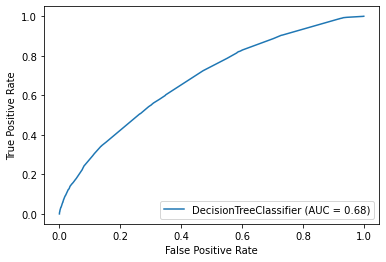

In [60]:
# predict the labels for the test data and print the accuracy and confusion matrix
y_pred2_1 = grid.best_estimator_.predict(X_test)

print("*** Decision Tree model - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred2_1))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2_1)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred2_1))

predictions = grid.best_estimator_.predict_proba(X_test)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(grid.best_estimator_, X_test, y_test) 
plt.show()

### 5.3 XGBoost Model

In [61]:
### 3rd model using XGBoost ###

We will do a train test split again as we dont need the training data that was scaled for Logistic Regression

In [62]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=0)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(99999,)
(79999,)
(20000,)


<b>Create a XGBoost Classifier and train the model using the training data. </b>

In [63]:
# load sklearn libraries required to construct a XGBoost model
import xgboost as xgb
from sklearn import metrics

#use the default XGBoost parameters
xgclf = xgb.XGBClassifier(random_state=12)

xgclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=12,
              reg_alpha=0, reg_lambda=1, ...)

<b>Predict the test data, and compare the predicted vs actual test labels.<br></b>

Find the metrics - <br>

   <i>Accuracy score, Confusion Matrix, Precesion, Recall, F1-score, Log Loss and ROC AUC</i>

*** XGBoost model - Metrics ***

Accuracy score =  0.83295

Confusion Matrix -
 [[16413   191]
 [ 3150   246]]

Classification report - 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     16604
           1       0.56      0.07      0.13      3396

    accuracy                           0.83     20000
   macro avg       0.70      0.53      0.52     20000
weighted avg       0.79      0.83      0.78     20000


Log Loss =  0.4104609696013853


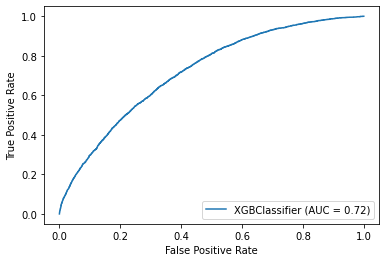

In [64]:
# predict the labels for the test data and print the accuracy and confusion matrix
y_pred3 = xgclf.predict(X_test)

print("*** XGBoost model - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred3))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred3)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred3))

predictions = xgclf.predict_proba(X_test)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(xgclf, X_test, y_test) 
plt.show()

### 7.2 Improving the XGBoost Model

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=0)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(99999,)
(79999,)
(20000,)


<b>Tune the Hyperparameters using GridSearchCV cross validation</b>

In [66]:
# Improving the XGBoost model
from sklearn import model_selection
xgb_model = xgb.XGBClassifier()

parameters = {'learning_rate': [0.2, 0.3],
              'max_depth': [2, 3],
              'min_child_weight': [2, 3],
              'n_estimators': [75, 100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

<b>Find the best parameters</b>

In [ ]:
clf_xgb.fit(X_train, y_train)

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)

<b>Predict the test data using the best estimator, and compare the predicted vs actual test labels.<br></b>

Find the metrics - <br>

   <i>Accuracy score, Confusion Matrix, Precesion, Recall, F1-score, Log Loss and ROC AUC</i>

In [ ]:
# predict the labels for the test data and print the accuracy and confusion matrix
y_pred4 = clf_xgb.best_estimator_.predict(X_test)

print("*** XGBoost model with Hyperparameter tuning - Metrics ***\n")

from sklearn import metrics
print("Accuracy score = ", metrics.accuracy_score(y_test, y_pred4))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred4)
print("\nConfusion Matrix -\n", cnf_matrix)

#print the precision, recall and f1-score 
print("\nClassification report - \n", classification_report(y_test, y_pred4))

predictions = clf_xgb.best_estimator_.predict_proba(X_test)
print("\nLog Loss = ", log_loss(y_test, predictions))

import matplotlib.pyplot as plt
metrics.plot_roc_curve(clf_xgb.best_estimator_, X_test, y_test) 
plt.show()

### Part 6 - Comparing the models

<table>
  <caption>MODEL COMPARISON</caption>
  <tr>    
    <td></td>
    <th scope="col"><font size="2">Accuracy</font></th>
    <th scope="col"><font size="2">F1 score</font></th>
    <th scope="col"><font size="2">Log Loss</font></th>
    <th scope="col"><font size="2">AUC</font></th>    
  </tr>
  <tr>
    <th scope="row"><font size="2">Dummy Classifier Model</font></th>
    <td><font size="2">83.1%</font></td>
    <td><font size="2">0.75</font></td>
    <td><font size="2">5.83</font></td>
    <td><font size="2">0.50</font></td>
  </tr>
  <tr>
    <th scope="row"><font size="2">Logistic Regression Model</font></th>
    <td><font size="2">83.2%</font></td>
    <td><font size="2">0.76</font></td>
    <td><font size="2">0.431</font></td>
    <td><font size="2">0.65</font></td>
  </tr>
  <tr>
    <th scope="row"><font size="2">Logistic Regression Model using PCA</font></th>
    <td><font size="2">83.2%</font></td>
    <td><font size="2">0.76</font></td>
    <td><font size="2">0.431</font></td>
    <td><font size="2">0.65</font></td>
  </tr>
  <tr>
    <th scope="row"><font size="2">Logistic Regression Model using cross validation</font></th>
    <td><font size="2">83.2%</font></td>
    <td><font size="2">0.76</font></td>
    <td><font size="2">0.431</font></td>
    <td><font size="2">0.65</font></td>
  </tr>
  <tr>
    <th scope="row"><font size="2">Decision Tree Model</font></th>
    <td><font size="2">74.3%</font></td>
    <td><font size="2">0.75</font></td>
    <td><font size="2">8.84</font></td>
    <td><font size="2">0.56</font></td>
  </tr>
  <tr>
    <th scope="row"><font size="2">Decision Tree with Hypertuning and cross validation</font></th>
    <td><font size="2">83.1%</font></td>
    <td><font size="2">0.77</font></td>
    <td><font size="2">0.425</font></td>
    <td><font size="2">0.68</font></td>
  </tr>
  <tr>
    <th scope="row"><font size="2">XGBoost Model</font></th>
    <td><font size="2">83.2%</font></td>
    <td><font size="2">0.78</font></td>
    <td><font size="2">0.410</font></td>
    <td><font size="2">0.72</font></td>
  </tr>
  <tr>
    <th scope="row"><font size="2">XGBoost Model Hypertuning and cross validation</font></th>
    <td><font size="2">83.3%</font></td>
    <td><font size="2">0.77</font></td>
    <td><font size="2">0.409</font></td>
    <td><font size="2">0.72</font></td>
  </tr>

</table>

<h4><b>Dummy Classifier:</b></h4><p>We created a Dummy Classifier to set a baseline and compare with the models that we've built in this Assignment.</p><p>Though the Accuracy is 83.1%, The AUC is 0.5 which indicates it a poor classifier and the Log Loss is 5.83 which is much far away from 0 and indicates very less predictability</p>
<h4><b>Logistic Regression Classifier:</b></h4><p>Accuracy is improved to 83.2%, The AUC is 0.65 which indicates its a better classifier compared to the Dummy classifier and the Log Loss has improved to 0.431</p>
<h4><b>Logistic Regression Model with PCA and cross validaion:</b></h4><p>We already found that PCA did not help improve the Cumulative Explained Variance, but we still got the dimentionality reduction to achieve the same performance as the Logistic Regression model. Cross validation also performed same as Logistic Regression without any improvement</p>
<h4><b>Decision Tree Classifier:</b></h4><p>Accuracy has decresed to 74.3%, The AUC is 0.56 which indicates its a poor  classifier compared to the Logistic Regression classifier and the Log Loss worser than the Dummy Classifier. This indicates that the Decision Tree has tried to Overfit and shows high variability and predictability</p>
<h4><b>Decision Tree with Hypertuning and Cross validation:</b></h4><p>Accuracy is improved to 83.1%, The AUC is 0.68 and the Log Loss has improved to 0.425. We have fixed the overfit issue and the model acually performs better than the Logistic Regression</p>
<h4><b>XGBoost:</b></h4><p>Accuracy is improved to 83.2%, The AUC is 0.72 and the Log Loss has improved to 0.410. The model performs better than the previous models </p>
<h4><b>XGBoost with Hypertuning and Cross validation:</b></h4><p>Accuracy is improved to 83.3%, The AUC is 0.72 and the Log Loss has improved to 0.409. This is the best performing model we have achieved </p>